# [OpenCV-Python Tutorial] Feature Matching

In this notebook, we will see how to extract SIFT(Scale-Invariant Feature Transform) and match SIFT features of two images with OpenCV-Python.

---

In [ ]:
!pip install opencv-python==3.3.0.10
!pip install opencv-contrib-python==3.3.0.10
!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/beaver.png
!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/box.png
!wget https://raw.githubusercontent.com/bckim92/iab_practice_example/master/images/box_in_scene.png

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==3.3.0.10 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python==3.3.0.10
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==3.3.0.10 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66,

In [ ]:
# For python2/3 compatibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt
import time

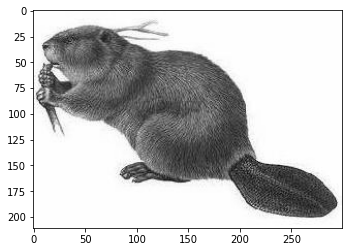

In [ ]:
# Load an image
beaver = cv2.imread('./beaver.png')
plt.imshow(cv2.cvtColor(beaver, cv2.COLOR_BGR2RGB))

In [ ]:
# Members of cv2.xfeatures2d
dir(cv2.xfeatures2d)

['AffineFeature2D',
 'BEBLID',
 'BEBLID_SIZE_256_BITS',
 'BEBLID_SIZE_512_BITS',
 'BEBLID_create',
 'BoostDesc',
 'BoostDesc_create',
 'BriefDescriptorExtractor',
 'BriefDescriptorExtractor_create',
 'DAISY',
 'DAISY_NRM_FULL',
 'DAISY_NRM_NONE',
 'DAISY_NRM_PARTIAL',
 'DAISY_NRM_SIFT',
 'DAISY_create',
 'FREAK',
 'FREAK_create',
 'HarrisLaplaceFeatureDetector',
 'HarrisLaplaceFeatureDetector_create',
 'LATCH',
 'LATCH_create',
 'LUCID',
 'LUCID_create',
 'MSDDetector',
 'MSDDetector_create',
 'PCTSIGNATURES_GAUSSIAN',
 'PCTSIGNATURES_HEURISTIC',
 'PCTSIGNATURES_L0_25',
 'PCTSIGNATURES_L0_5',
 'PCTSIGNATURES_L1',
 'PCTSIGNATURES_L2',
 'PCTSIGNATURES_L2SQUARED',
 'PCTSIGNATURES_L5',
 'PCTSIGNATURES_L_INFINITY',
 'PCTSIGNATURES_MINUS',
 'PCTSIGNATURES_NORMAL',
 'PCTSIGNATURES_REGULAR',
 'PCTSIGNATURES_UNIFORM',
 'PCTSignatures',
 'PCTSignaturesSQFD',
 'PCTSignaturesSQFD_create',
 'PCTSignatures_GAUSSIAN',
 'PCTSignatures_HEURISTIC',
 'PCTSignatures_L0_25',
 'PCTSignatures_L0_5',
 'PCTSig

# Extract SIFT features from an image

## 1. SIFT detector

(211, 300, 3) => (211, 300)


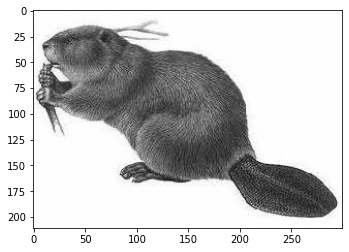

In [ ]:
# Convert image color(BGR->Grayscale) SIFT는 GRAY로 다 받기 때문임.
gray = cv2.cvtColor(beaver, cv2.COLOR_BGR2GRAY)
# You can convert the image when calling cv2.imread()
# gray = cv2.imread('./beaver.png', cv2.IMREAD_GRAYSCALE)

print(str(beaver.shape) + " => " + str(gray.shape))
plt.imshow(gray, cmap='gray')

In [ ]:
# SIFT feature detector/descriptor
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
# SIFT feature detection
start_time = time.time()
kp = sift.detect(gray, None) # 2nd pos argument is a mask indicating a part of image to be searched in
# 디텍트함수를 사용하여 찾는다
#kp = sift.detect(beaver, None) # 2nd pos argument is a mask indicating a part of image to be searched in
print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.118768s


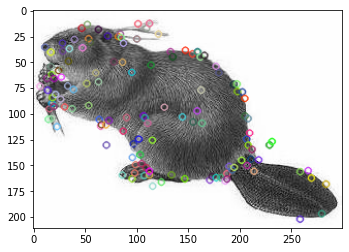

In [ ]:
# Display the SIFT features
beaver_sift = cv2.drawKeypoints(beaver, kp, None)
plt.imshow(cv2.cvtColor(beaver_sift, cv2.COLOR_BGR2RGB))

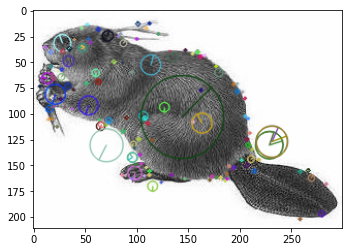

In [ ]:
# Display the rich SIFT features
beaver_sift2 = cv2.drawKeypoints(beaver, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(beaver_sift2, cv2.COLOR_BGR2RGB))

In [ ]:
# Inspect the keypoints
print(type(kp))
print(len(kp))

<class 'tuple'>
144


In [ ]:
print(type(kp[0]))
print(dir(kp[0]))#다양한 KEYPOINT를 살펴볼 수 있다. 예를들어, angle, octave(피라미드형식의 알고리즘에서 나옴), position(좌표), size

<class 'cv2.KeyPoint'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


In [ ]:
# A keypoint's property
# kp is sorted by scale of the keypoints
print(kp[-1].angle) # Orientation
print(kp[-1].class_id)
print(kp[-1].octave)
print(kp[-1].pt) # Position
print(kp[-1].response)
print(kp[-1].size) # Scale

317.97381591796875
-1
9437951
(283.1337890625, 167.98963928222656)
0.04295659437775612
2.578029155731201


## 2. Extract SIFT descriptor

In [ ]:
# Extract SIFT feature from the (gray) image and detected keypoints
start_time = time.time()
kp, des = sift.compute(gray, kp)
print('Elapsed time: %.6fs' % (time.time() - start_time))#des의 array에 keypoint 144개가 저장됨. des는 numpy array.

# SIFT keypoints and descriptors at the same time
# start_time = time.time()
# kp, des = sift.detectAndCompute(gray, None)
# print('Elapsed time: %.6fs' % (time.time() - start_time))

Elapsed time: 0.018875s


In [ ]:
# Inspect the descriptors
print(type(des))
print(des.shape)
print(des.dtype)

<class 'numpy.ndarray'>
(144, 128)
float32


In [ ]:
print(len(des[0, :]))
print(des[0, :])#이런 벡터가 이미지 분류기 형태를 넣을 때 이런 형태로 집어넣는다.

128
[ 57.  42.  30.  40.  49.   1.   0.  20.  37.  35.  16.  29.  43.   2.
   6.  50.  19.  20.  14.   7.  11.  28.  37. 109.  65.   0.   0.   1.
   2.   7.  28. 150.  27.  40.  58.  50.  13.   0.   0.   9. 150.  34.
  24.  23.   5.   0.   8. 134.  50.   8.   3.   0.   0.   0.  51. 150.
   3.   0.   0.   0.   0.   1.  28.  95.  24.   5.  14.  31.  21.  16.
   9.  15. 150.  65.   3.   5.   2.   1.   7.  53. 150.  28.   0.   0.
   0.   0.   2.  45.   4.   0.   0.   0.   0.   1.   2.   7.  21.   2.
   1.   4.   9.  22.  22.  28. 150.  11.   0.   0.   0.   0.  11.  86.
 150.   7.   0.   0.   0.   0.   0.  31.   3.   0.   0.   0.   0.   0.
   0.   2.]


---

# Feature Matching

## 1. SIFT Feature Matching

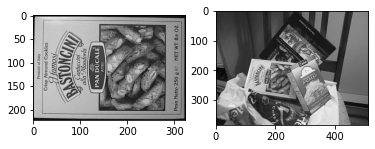

In [ ]:
# Open and show images
img1 = cv2.imread('./box.png')
img2 = cv2.imread('./box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [ ]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.153348s
Image 1 - 604 feature detected
Image 2 - 969 feature detected


In [ ]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

604 matches


In [ ]:
# Inspect matcher results
print(type(matches))
print(len(matches))
print(type(matches[0]))
print(len(matches[0]))  # Number of match candidate = k

<class 'tuple'>
604
<class 'tuple'>
2


In [ ]:
print(type(matches[0][0]))
print(dir(matches[0][0]))

<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [ ]:
print(matches[0][0].distance)#가장유사한게 212만큼 차이나고
print(matches[0][0].queryIdx)#이건 어디있는지?
print(matches[0][0].trainIdx)#image2중에 어떤 디스크립터가 어디 몇번째에 있는가?
print(matches[0][0].imgIdx)#비교중인이미지가몇번째이미지인건가?
print(matches[0][1].distance)
print(matches[0][1].queryIdx)
print(matches[0][1].trainIdx)
print(matches[0][1].imgIdx)

212.0023651123047
0
336
0
256.8598937988281
0
717
0


In [ ]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)#좋은 matches라는 factor임을 표현한다.............
print('%d matches' % len(good_matches))

80 matches


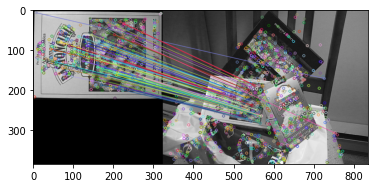

In [ ]:
# Display matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))#이미지의 기준이 되는 keypoint boximage를 다 보고 나서 80개의 ratio test를 display하면 표현이됨을 확인가능하다